# Project proposal
## Image Understanding

### Authors

- Jorge López Rosende
- Rafael Martín Lesmes
- José Vences Rodríguez
- Manuel Rincón Martínez
- Kévin Alberto López Porcheron

## What is the problem that you will be investigating?

We are going to analyse the images in the dataset to develop a classifier capable of determinating wether a given image is cancer positive.

## What data will you use?

We are going to explore the [colorectal_histology](https://www.tensorflow.org/datasets/catalog/colorectal_histology) dataset from Tensorflow's database of Image Classification datasets.

## Describe the data you will use

Tensorflow's [colorectal_histology](https://www.tensorflow.org/datasets/catalog/colorectal_histology) dataset contains 5000 150x150x3 RGB images that can be from one of eight different classes. The total size of the dataset is `246.14 MiB`.

## Preliminary exploratory analysis of the data

We can obtein some information about the dataset observing the histogram of the images. 

We discover some classes have similar histograms, for example, **dipose** and **empty** classes.

In the same group we observe diferent cell sizes and tissue staining.

This properties make the clasification harder.



In [26]:
%pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [27]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import tensorflow_data_validation as tfdv
%matplotlib inline

In [28]:
ds, ds_info = tfds.load('ColorectalHistology', shuffle_files = True, split = 'train', with_info = True)

### Metadata

In [29]:
print(ds_info)

tfds.core.DatasetInfo(
    name='colorectal_histology',
    full_name='colorectal_histology/2.0.0',
    description="""
    Classification of textures in colorectal cancer histology. Each example is a 150 x 150 x 3 RGB image of one of 8 classes.
    """,
    homepage='https://zenodo.org/record/53169#.XGZemKwzbmG',
    data_path='/home/rosende95/tensorflow_datasets/colorectal_histology/2.0.0',
    download_size=246.14 MiB,
    dataset_size=179.23 MiB,
    features=FeaturesDict({
        'filename': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(150, 150, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=8),
    }),
    supervised_keys=('image', 'label'),
    splits={
        'train': <SplitInfo num_examples=5000, num_shards=2>,
    },
    citation="""@article{kather2016multi,
      title={Multi-class texture analysis in colorectal cancer histology},
      author={Kather, Jakob Nikolas and Weis, Cleo-Aron and Bianconi, Francesco and Me

### Samples's shapes and types of (raw) data

In [30]:
print(ds_info.features.shape)
print(ds_info.features.dtype)
print(ds_info.features['image'].shape)
print(ds_info.features['image'].dtype)

{'image': (150, 150, 3), 'label': (), 'filename': ()}
{'image': tf.uint8, 'label': tf.int64, 'filename': tf.string}
(150, 150, 3)
<dtype: 'uint8'>


### Number and names of classes 

In [31]:
print(ds_info.features["label"].num_classes)
print(ds_info.features["label"].names)

8
['tumor', 'stroma', 'complex', 'lympho', 'debris', 'mucosa', 'adipose', 'empty']


### Dataset visualization

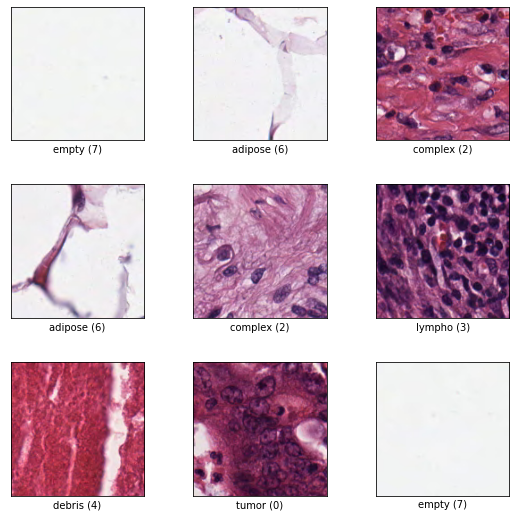

In [32]:
fig = tfds.show_examples(ds, ds_info)

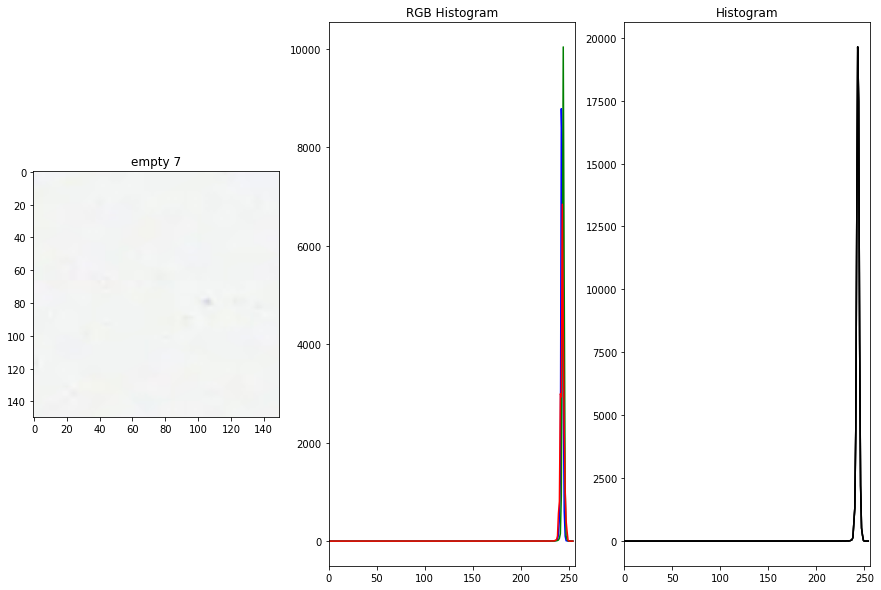

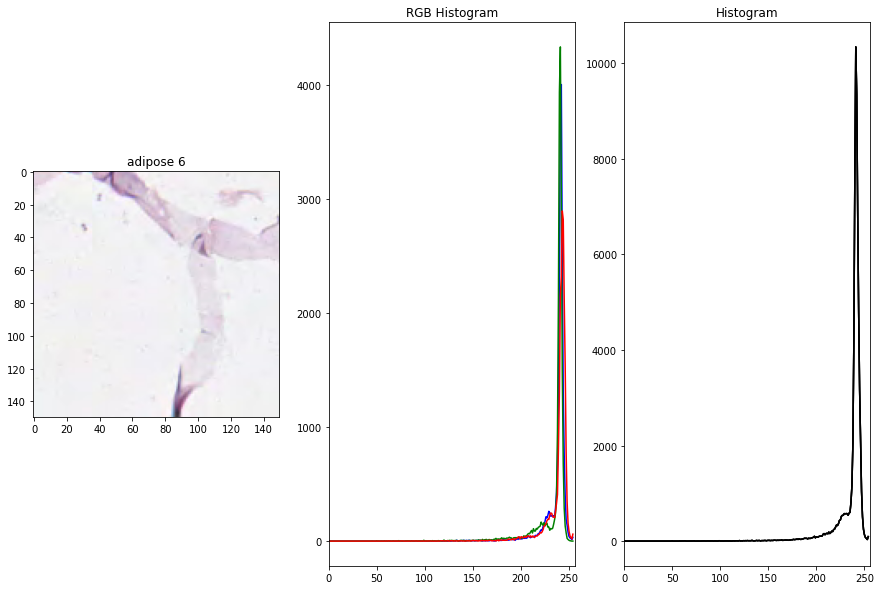

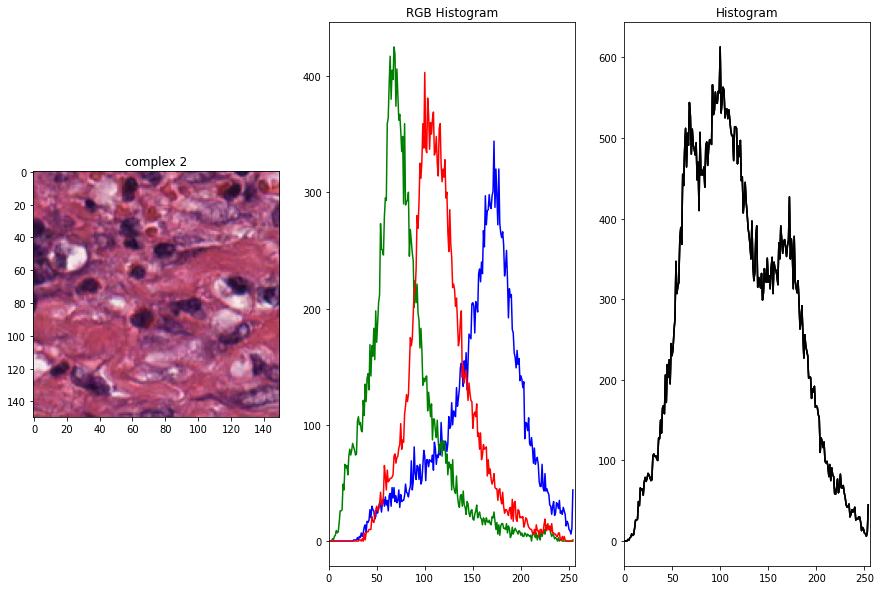

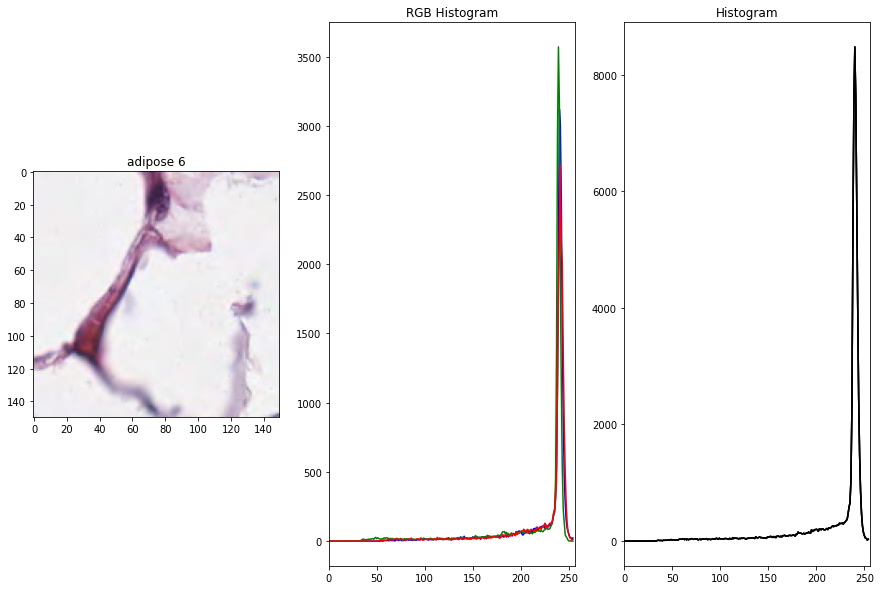

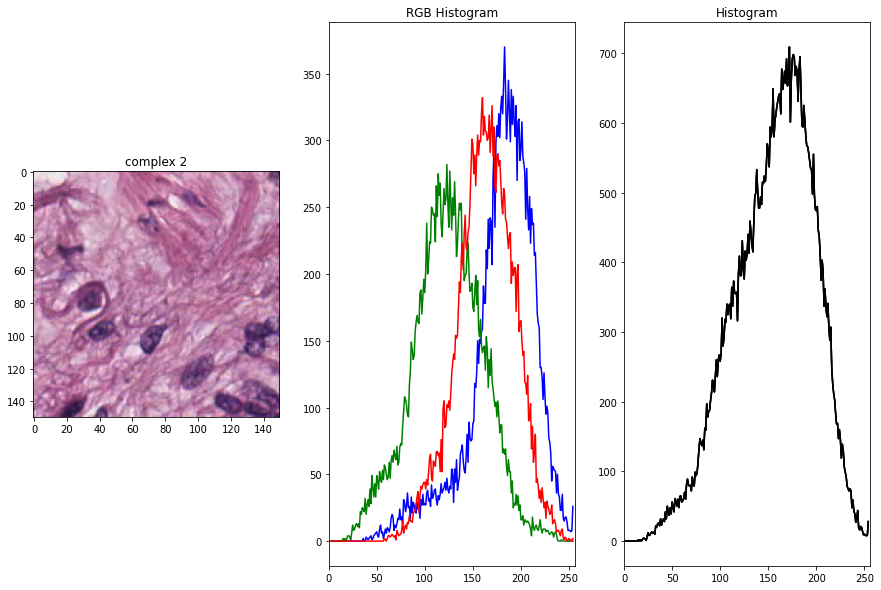

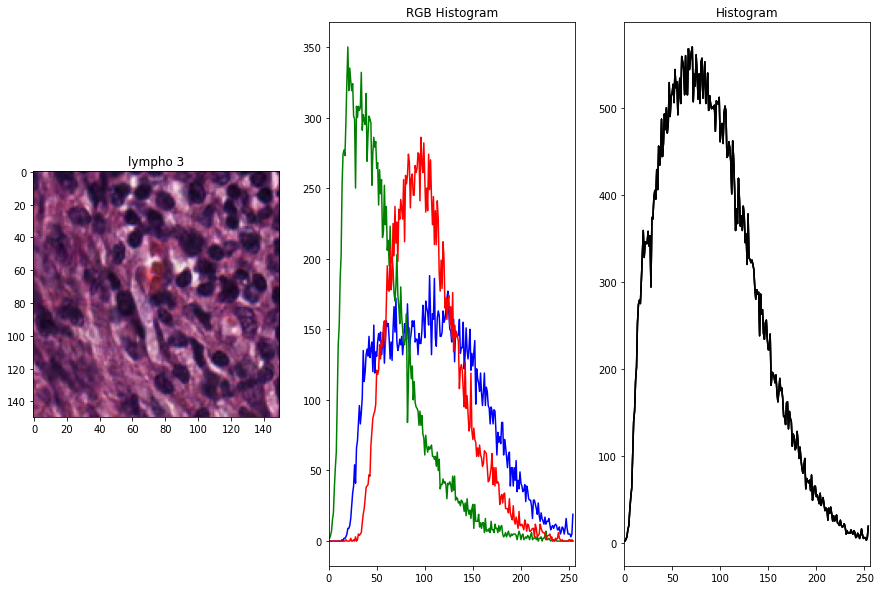

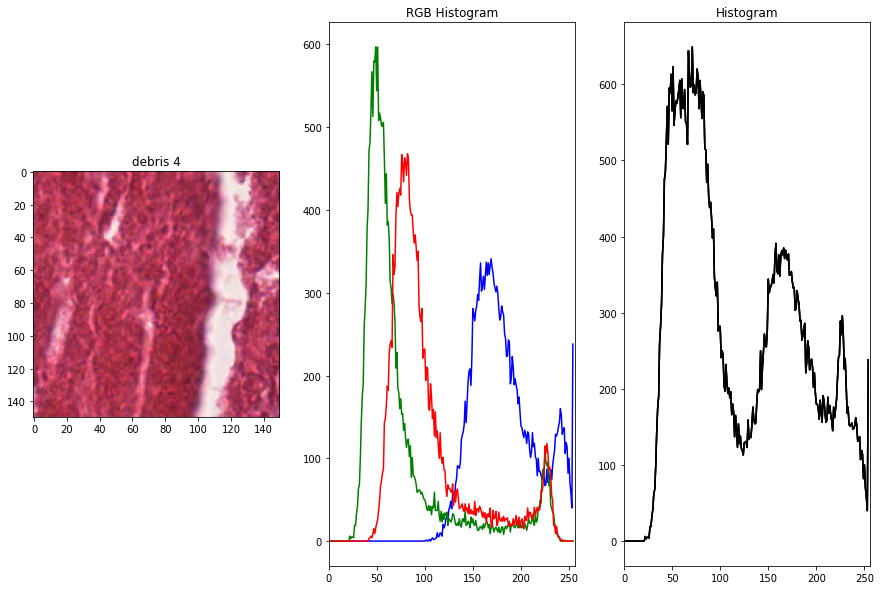

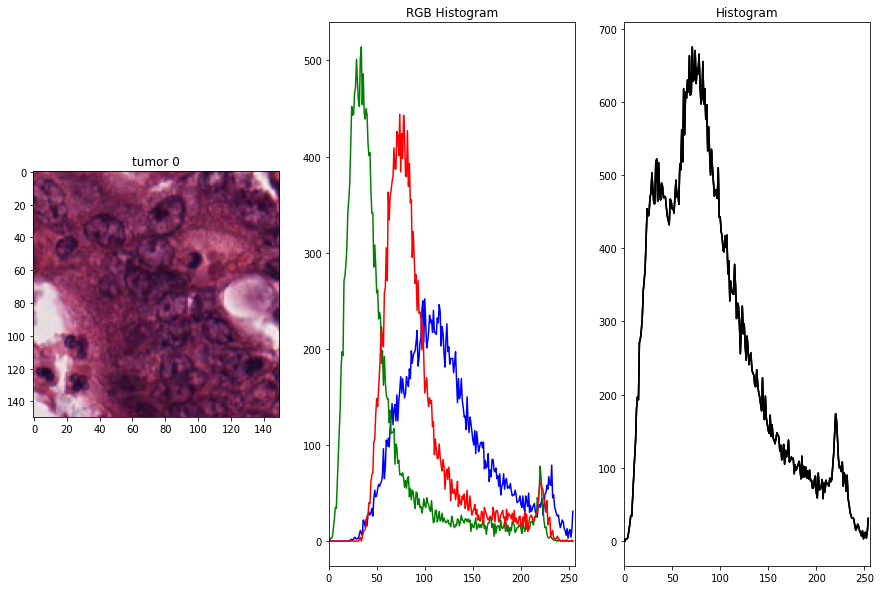

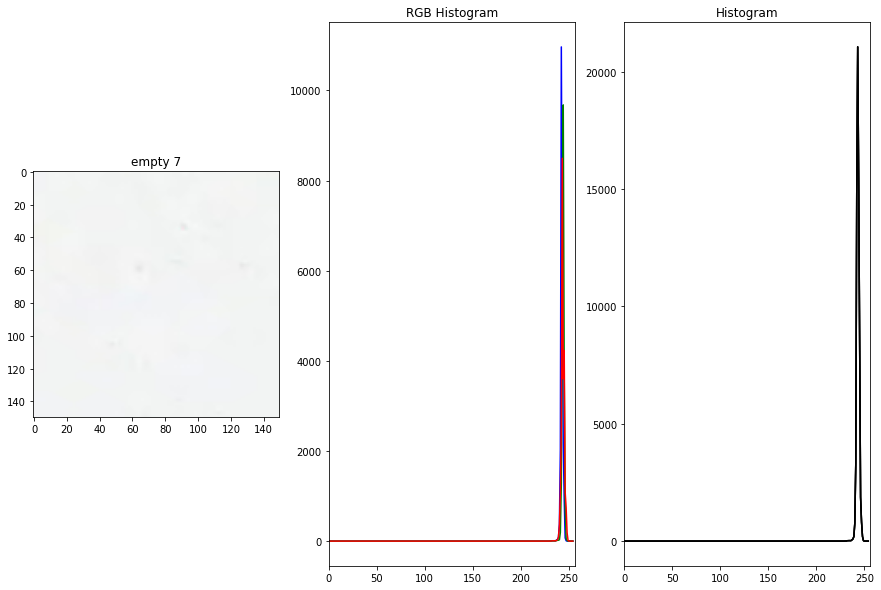

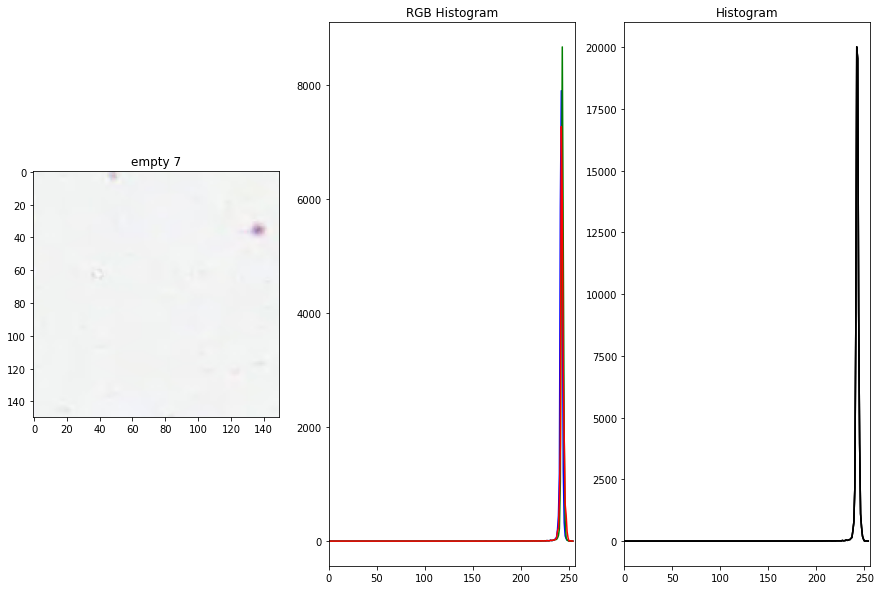

In [34]:
labels = ds_info.features["label"].names
for e in ds.take(10):
    fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,10))
    label = f"{labels[e['label'].numpy()]} {e['label'].numpy()}" 
    img = e['image'].numpy()
    color = ('b','g','r')
    for i, col in enumerate(color):
        ax1.imshow(img)
        ax1.set_title(label)
        histr,_ = np.histogram(img[:,:,i], bins=range(256))
        ax2.plot(histr, color = col)
        ax2.set_xlim([0, 256])
        ax2.set_title("RGB Histogram")
        histr,_ = np.histogram(img, bins=range(256))
        ax3.plot(histr, color = 'black')
        ax3.set_xlim([0, 256])
        ax3.set_title("Histogram")
    plt.show()

,filename,image,label
0,143B2_CRC-Prim-HE-03_006.tif_Row_301_Col_1051.tif,,5 (mucosa)
1,160F4_CRC-Prim-HE-08_021.tif_Row_1201_Col_1651.tif,,4 (debris)
2,153A0_CRC-Prim-HE-09_001.tif_Row_2401_Col_751.tif,,5 (mucosa)
3,12F96_CRC-Prim-HE-02_025.tif_Row_151_Col_601.tif,,0 (tumor)
4,159AD_CRC-Prim-HE-06_004.tif_Row_1351_Col_1201.tif,,6 (adipose)
5,126D0_CRC-Prim-HE-03_012.tif_Row_2551_Col_1651.tif,,6 (adipose)
6,1212B_CRC-Prim-HE-10_020.tif_Row_1_Col_2851.tif,,6 (adipose)
7,6A3E_CRC-Prim-HE-04_030.tif_Row_451_Col_1.tif,,4 (debris)
8,14466_CRC-Prim-HE-03_001.tif_Row_1351_Col_451.tif,,1 (stroma)
9,DD7F_CRC-Prim-HE-02.tif_Row_1051_Col_751.tif,,3 (lympho)

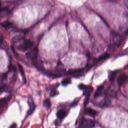
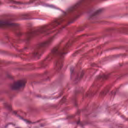
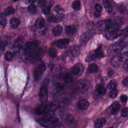
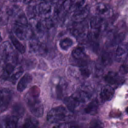
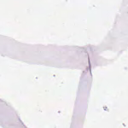
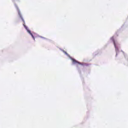
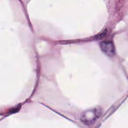
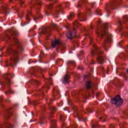
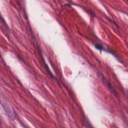
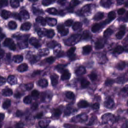

In [33]:
tfds.as_dataframe(ds.take(10), ds_info)